In [1]:
!ls

6_EvaluateModelsWithXGBoost.ipynb
OneHotEncodeCategoricalData.ipynb
Part3_Feature Importance With XGBoost And Feature Selection.ipynb
Part3_Save and Load Trained XGBoost Models.ipynb
XGBoostWithMissingData.ipynb
breast-cancer.data
breast-cancer.names
dataset
iris.csv
iris.names
myFirstModel.ipynb
mySecondModel.ipynb
pima.joblib.dat
pima.pickle.dat


In [8]:
# To run a specific notebook from here
%run "Part3_Save and Load Trained XGBoost Models.ipynb"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
0    768 non-null int64
1    768 non-null int64
2    768 non-null int64
3    768 non-null int64
4    768 non-null int64
5    768 non-null float64
6    768 non-null float64
7    768 non-null int64
8    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Features :  [0, 1, 2, 3, 4, 5, 6, 7]
Label : 8


<Figure size 640x480 with 1 Axes>

[13:01:34] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model : 
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)
Accuracy:  0.7401574803149606


C:\Users\X168586\AppData\Local\Continuum\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)
score from loaded model 1.0
score_loaded_model_from_joblib 1.0


In [9]:
!who

In [10]:
%who

X	 XGBClassifier	 X_test	 X_train	 accuracy_score	 df	 features	 joblib	 label	 
loaded_model_from_joblib	 loaded_model_from_pickle	 model	 np	 pd	 pickle	 plot_tree	 plt	 score	 
score_from_loaded_model_from_pickle	 score_loaded_model_from_joblib	 train_test_split	 y	 y_pred	 y_predicted_from_loaded_model	 y_predictions_from_loaded_model_from_joblib	 y_test	 y_train	 



In [12]:
# Feature importance
print(model.feature_importances_)

[0.08907107 0.23959671 0.08799455 0.09824965 0.09801765 0.15170811
 0.09959184 0.13577047]


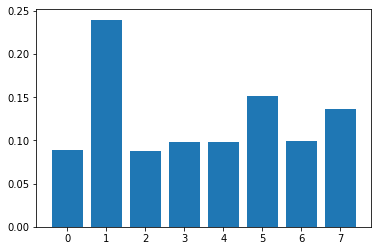

In [13]:
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

## Using theBuilt-in XGBoost Feature Importance Plot

In [14]:
from xgboost import plot_importance

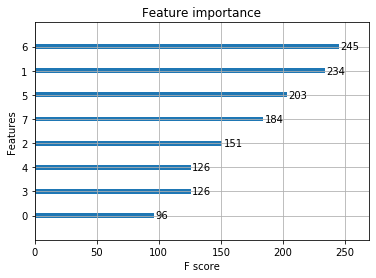

In [15]:
plot_importance(model)
plt.show()

## Feature Selection with XGBoost Feature Importance Scores

In [23]:
#To silence the warnings
import warnings
warnings.filterwarnings('ignore')

In [24]:
from sklearn.feature_selection import SelectFromModel

In [35]:
my_dict={}
# Soring the importances of the features in asceding order
thresholds = np.sort(model.feature_importances_)
for threshold in thresholds:
#  threshold,   Features whose importance is greater or equal are kept while the others are discarded
#  prefit ,      Whether a prefit model is expected to be passed into the constructor directly or not. 
    selection = SelectFromModel(model, threshold= threshold, prefit=True)
    select_X_train = selection.transform(X_train)
    
#     train the model with selected features.
    selection_model = XGBClassifier()
    selection_model.fit(select_X_train, y_train)
    
#     Evaluate the model
    select_X_test = selection.transform(X_test)
    predictions = selection_model.predict(select_X_test)
    accuracy = accuracy_score(y_test, predictions)
    print("Threshold=%.3f, n=%d, Accuracy=%.2f%%", (threshold, select_X_train.shape[1], accuracy*100.0))
    my_dict[select_X_train.shape[1]] = accuracy



[13:54:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold=%.3f, n=%d, Accuracy=%.2f%% (0.087994546, 8, 74.01574803149606)
[13:54:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold=%.3f, n=%d, Accuracy=%.2f%% (0.089071065, 7, 71.65354330708661)
[13:54:16] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Threshold=%.3f, n=%d, Accuracy=%.2f%% (0.09801765, 6, 71.25984251968504)
[13:54:17] WARNING: ..\

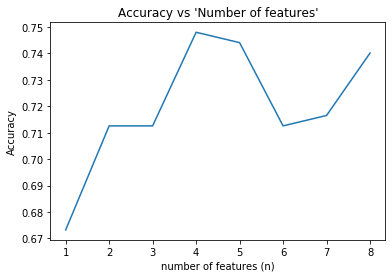

In [36]:
# To create a plot for accuracy vs features

lists = sorted(my_dict.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.xlabel("number of features (n)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs 'Number of features'")
plt.plot(x, y)
plt.show()

It seems that having the feature 4 and followings in the model gives the highest accuracy. 